## Informasi Mahasiswa

Nama: Devi Anggraini

NPM : 210810701008

## Jenis Dataset


Dataset yang digunakan di ambil dari situs kaggel (https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset).
Data ini terdiri dari beberapa atribut sebagai berikut:
- Kehamilan (Pregnancies): Jumlah kehamilan yang pernah dialami oleh pasien.
- Glukosa (Glucose): Konsentrasi glukosa plasma 2 jam setelah tes toleransi glukosa oral.
- Tekanan darah (BloodPressure): Tekanan darah diastolik (mm Hg).
- Ketebalan Kulit (	SkinThickness): Ketebalan lipatan kulit trisep (mm).
- Insulin (Insulin): Kadar insulin serum 2 jam setelah pemberian glukosa (mu U/ml).
- IMT (Indeks Massa Tubuh)/ (BMI): IMT (berat dalam kg/(tinggi dalam m)^2).
- Fungsi Pedigree Diabetes (DiabetesPedigreeFunction): Nilai fungsi pedigri diabetes.
- Usia (Age): Usia pasien (tahun).
- Hasil (Outcome): Variabel kelas yang menunjukkan apakah pasien dinyatakan positif (1) atau negatif (0) terhadap diabetes.
Dataset ini berisi 768 instansi dengan 8 atribut numerik dan satu atribut kelas. Semua pasien dalam dataset ini adalah wanita setidaknya berusia 21 tahun dengan warisan Indian Pima.

Tujuannya adalah untuk memprediksi apakah seorang pasien memiliki diabetes berdasarkan pengukuran diagnostik.


## Import Library

In [1]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Melakukan Pembacaan Dataset 
dataset = pd.read_csv('diabetes.csv')

# Menampilkan dataset
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing

In [5]:
#Checking Null Values
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Membuat objek LabelEncoder
en = LabelEncoder()

# Lakukan encoding pada setiap kolom yang memerlukan
dataset['Pregnancies'] = en.fit_transform(dataset['Pregnancies'])
dataset['Glucose'] = en.fit_transform(dataset['Glucose'])
dataset['BloodPressure'] = en.fit_transform(dataset['BloodPressure'])
dataset['SkinThickness'] = en.fit_transform(dataset['SkinThickness'])
dataset['Insulin'] = en.fit_transform(dataset['Insulin'])
dataset['BMI'] = en.fit_transform(dataset['BMI'])
dataset['DiabetesPedigreeFunction'] = en.fit_transform(dataset['DiabetesPedigreeFunction'])
dataset['Age'] = en.fit_transform(dataset['Age'])
dataset['Outcome'] = en.fit_transform(dataset['Outcome'])

# Tampilkan data setelah encoding
print(dataset.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6       86             22             28        0  123   
1            1       23             19             22        0   62   
2            8      121             17              0        0   30   
3            1       27             19             16       62   77   
4            0       75              4             28      102  209   

   DiabetesPedigreeFunction  Age  Outcome  
0                       350   29        1  
1                       196   10        0  
2                       368   11        1  
3                        53    0        0  
4                       514   12        1  


In [7]:
#Checking Duplicates
data_duplicates_rows=dataset[dataset.duplicated()]
data_duplicates_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
#Removing Duplicates in any
dataset=dataset.drop_duplicates()
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


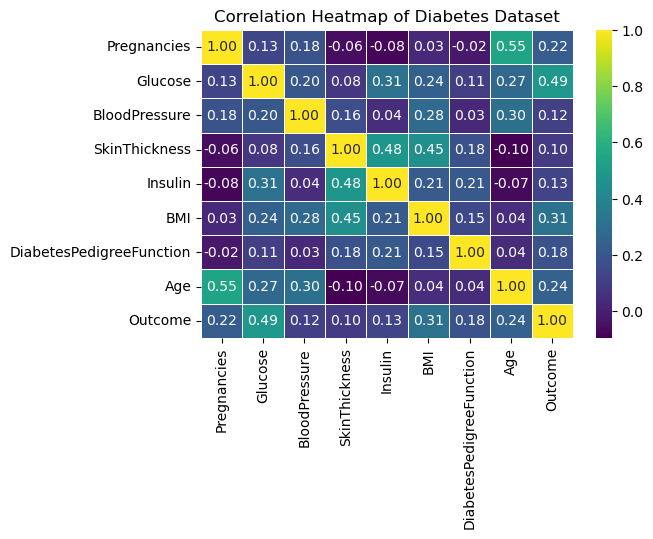

In [11]:
# Menghitung korelasi antar variabel
correlation_matrix = dataset.corr()

# Membuat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

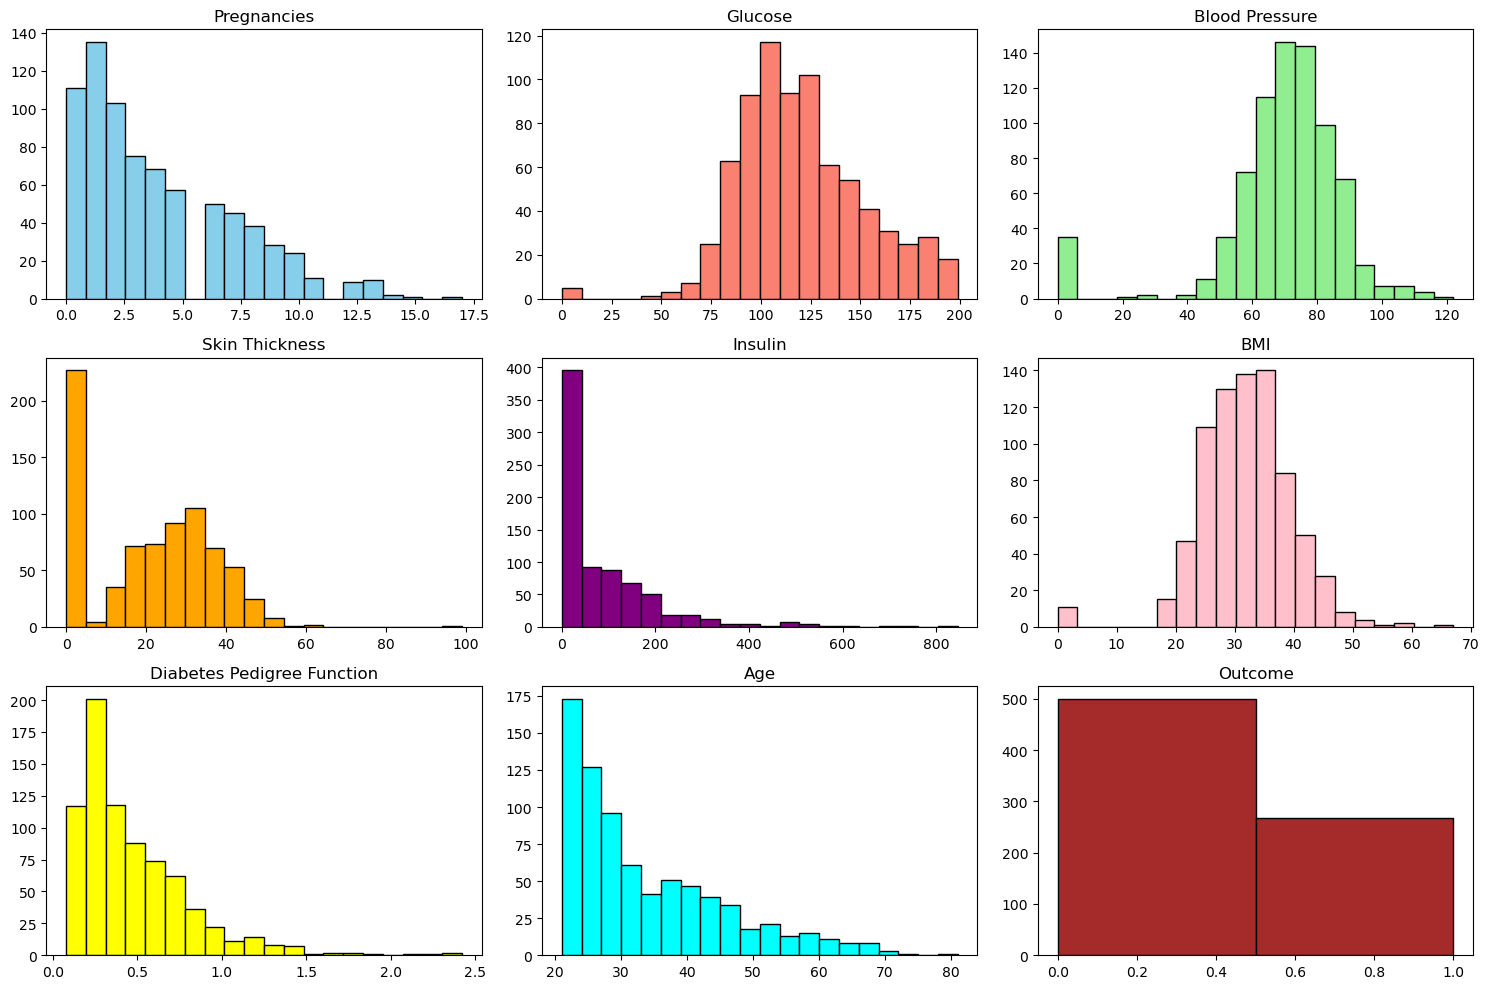

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
dataset = pd.read_csv('diabetes.csv')

# Menggunakan histogram untuk melihat distribusi setiap variabel
plt.figure(figsize=(15, 10))

# Variabel 'Pregnancies'
plt.subplot(3, 3, 1)
plt.hist(dataset['Pregnancies'], bins=20, color='skyblue', edgecolor='black')
plt.title('Pregnancies')

# Variabel 'Glucose'
plt.subplot(3, 3, 2)
plt.hist(dataset['Glucose'], bins=20, color='salmon', edgecolor='black')
plt.title('Glucose')

# Variabel 'BloodPressure'
plt.subplot(3, 3, 3)
plt.hist(dataset['BloodPressure'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Blood Pressure')

# Variabel 'SkinThickness'
plt.subplot(3, 3, 4)
plt.hist(dataset['SkinThickness'], bins=20, color='orange', edgecolor='black')
plt.title('Skin Thickness')

# Variabel 'Insulin'
plt.subplot(3, 3, 5)
plt.hist(dataset['Insulin'], bins=20, color='purple', edgecolor='black')
plt.title('Insulin')

# Variabel 'BMI'
plt.subplot(3, 3, 6)
plt.hist(dataset['BMI'], bins=20, color='pink', edgecolor='black')
plt.title('BMI')

# Variabel 'DiabetesPedigreeFunction'
plt.subplot(3, 3, 7)
plt.hist(dataset['DiabetesPedigreeFunction'], bins=20, color='yellow', edgecolor='black')
plt.title('Diabetes Pedigree Function')

# Variabel 'Age'
plt.subplot(3, 3, 8)
plt.hist(dataset['Age'], bins=20, color='cyan', edgecolor='black')
plt.title('Age')

# Variabel 'Outcome'
plt.subplot(3, 3, 9)
plt.hist(dataset['Outcome'], bins=2, color='brown', edgecolor='black')
plt.title('Outcome')

plt.tight_layout()
plt.show()

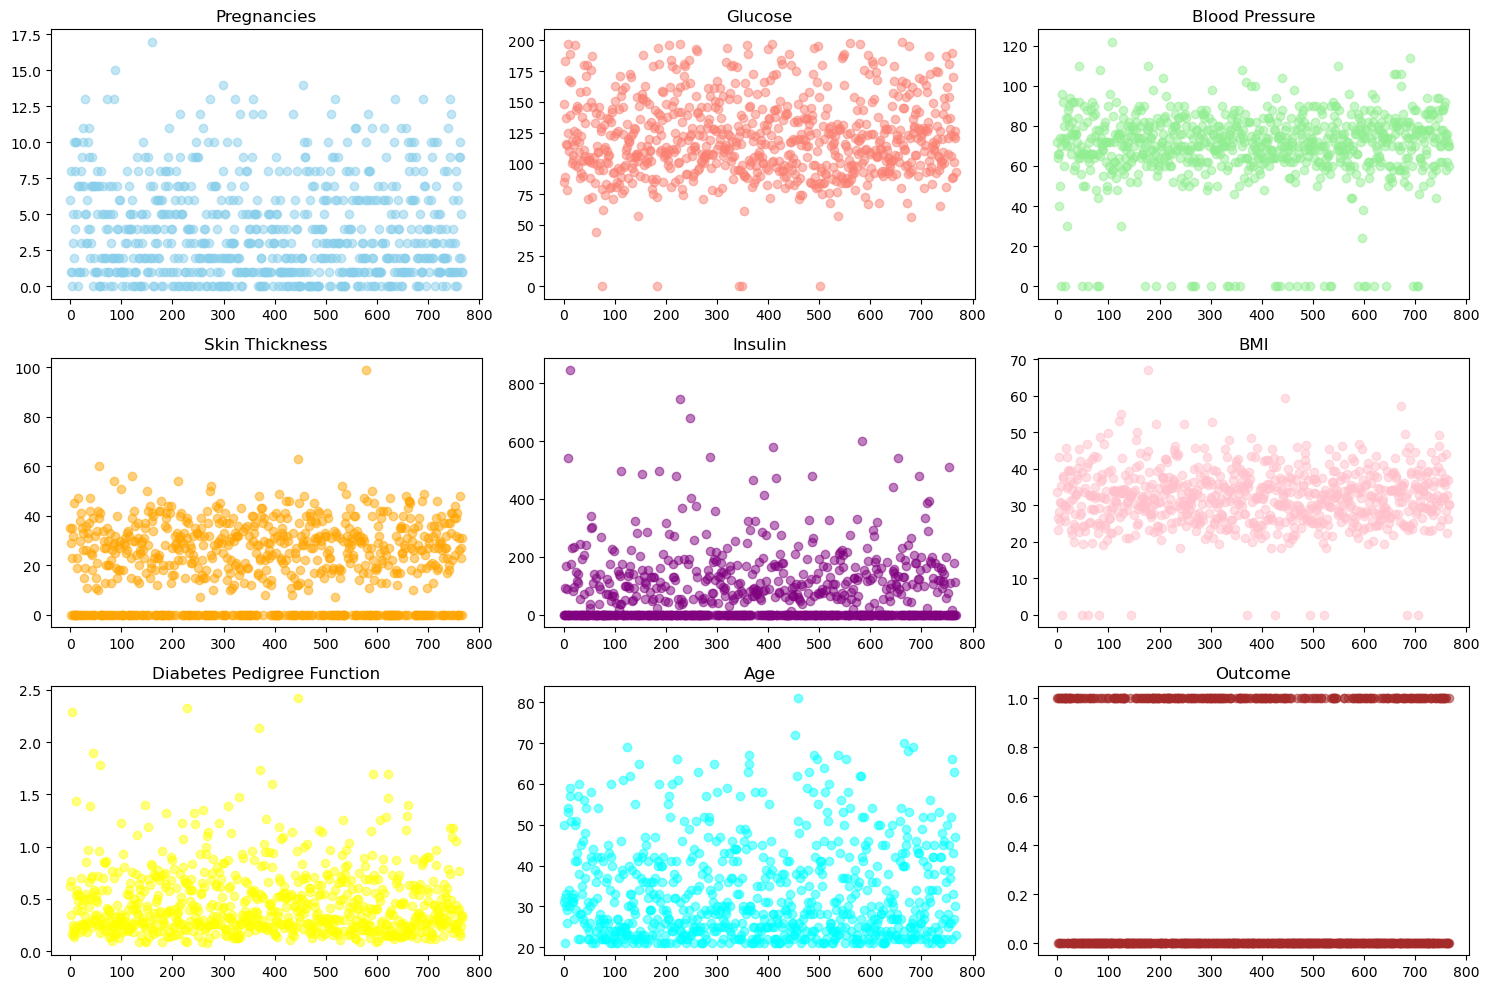

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
dataset = pd.read_csv('diabetes.csv')

# Membuat scatter plot untuk setiap variabel
plt.figure(figsize=(15, 10))

# Variabel 'Pregnancies'
plt.subplot(3, 3, 1)
plt.scatter(dataset.index, dataset['Pregnancies'], color='skyblue', alpha=0.5)
plt.title('Pregnancies')

# Variabel 'Glucose'
plt.subplot(3, 3, 2)
plt.scatter(dataset.index, dataset['Glucose'], color='salmon', alpha=0.5)
plt.title('Glucose')

# Variabel 'BloodPressure'
plt.subplot(3, 3, 3)
plt.scatter(dataset.index, dataset['BloodPressure'], color='lightgreen', alpha=0.5)
plt.title('Blood Pressure')

# Variabel 'SkinThickness'
plt.subplot(3, 3, 4)
plt.scatter(dataset.index, dataset['SkinThickness'], color='orange', alpha=0.5)
plt.title('Skin Thickness')

# Variabel 'Insulin'
plt.subplot(3, 3, 5)
plt.scatter(dataset.index, dataset['Insulin'], color='purple', alpha=0.5)
plt.title('Insulin')

# Variabel 'BMI'
plt.subplot(3, 3, 6)
plt.scatter(dataset.index, dataset['BMI'], color='pink', alpha=0.5)
plt.title('BMI')

# Variabel 'DiabetesPedigreeFunction'
plt.subplot(3, 3, 7)
plt.scatter(dataset.index, dataset['DiabetesPedigreeFunction'], color='yellow', alpha=0.5)
plt.title('Diabetes Pedigree Function')

# Variabel 'Age'
plt.subplot(3, 3, 8)
plt.scatter(dataset.index, dataset['Age'], color='cyan', alpha=0.5)
plt.title('Age')

# Variabel 'Outcome'
plt.subplot(3, 3, 9)
plt.scatter(dataset.index, dataset['Outcome'], color='brown', alpha=0.5)
plt.title('Outcome')

plt.tight_layout()
plt.show()

### Split Dataset

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membaca data dari file CSV
dataset = pd.read_csv('diabetes.csv')

# Memisahkan fitur (features) dan target (target)
X = dataset.drop('Outcome', axis=1)  # Mengambil semua kolom kecuali Outcome sebagai fitur
y = dataset['Outcome']  # Hanya mengambil kolom Outcome sebagai target

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur-fitur (features) menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tampilkan contoh beberapa data latih yang sudah dinormalisasi
print("Contoh data latih yang sudah dinormalisasi:")
print(X_train_scaled[:5])

# Tampilkan contoh beberapa data uji yang sudah dinormalisasi
print("Contoh data uji yang sudah dinormalisasi:")
print(X_test_scaled[:5])

Contoh data latih yang sudah dinormalisasi:
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]
Contoh data uji yang sudah dinormalisasi:
[[ 0.68185612 -0.71402038 -0.61712658  0.81710976  0.93474906  0.26073561
  -0.11637247  0.87809089]
 [-0.52639686 -0.27664283  0.30191569  0.7522648  -0.70120553  0.48053518
  -0.954231   -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 -1.32277365 -0.70120553 -0.15300476
  -0.9245197  -1.03594038]
 [ 1.28598261 -0.43284909  0.57222224 -1.32277365 -0.70120553 -0.95462672
   1.14932872  0.0950781 ]
 [ 0

## Membangun model

In [14]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
# SVM using Linear kernel
svm_linear= SVC(kernel='linear',random_state=42)

In [16]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [17]:
y_pred_test_svm=svm_linear.predict(X_test)

In [18]:
# Prediksi menggunakan model SVM
y_pred_test_svm = svm_linear.predict(X_test)

# Konversi y_test menjadi integer jika tipe datanya float
y_test = y_test.astype(int)

# Hitung akurasi
accuracy_score_svm = accuracy_score(y_test, y_pred_test_svm)
print("Akurasi SVM:", accuracy_score_svm)

Akurasi SVM: 0.7597402597402597


In [19]:
print('\nHASIL KLASIFIKASI:\n\n', classification_report(y_test, y_pred_test_svm, zero_division=1))


HASIL KLASIFIKASI:

               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



## Visualisasi

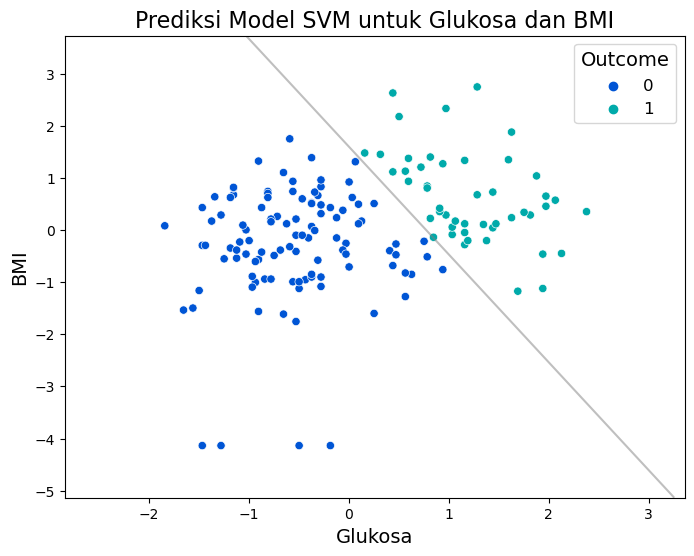

In [27]:
# Membaca data dari file CSV
data = pd.read_csv('diabetes.csv')

# Memisahkan fitur (features) dan target (target)
X = data[['Glucose', 'BMI']].values
y = data['Outcome'].values

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model SVM
svm_bmi = SVC(kernel='linear', probability=True)
svm_bmi.fit(X_train, y_train)

# Memprediksi data uji
y_pred_bmi = svm_bmi.predict(X_test)

# Plot untuk Glukosa vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_bmi, palette='winter')  # Mengubah palet warna menjadi 'winter'
plt.xlabel('Glukosa', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('Prediksi Model SVM untuk Glukosa dan BMI', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Menambahkan garis batas keputusan
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_bmi.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='grey', levels=[0], alpha=0.5)

plt.show()


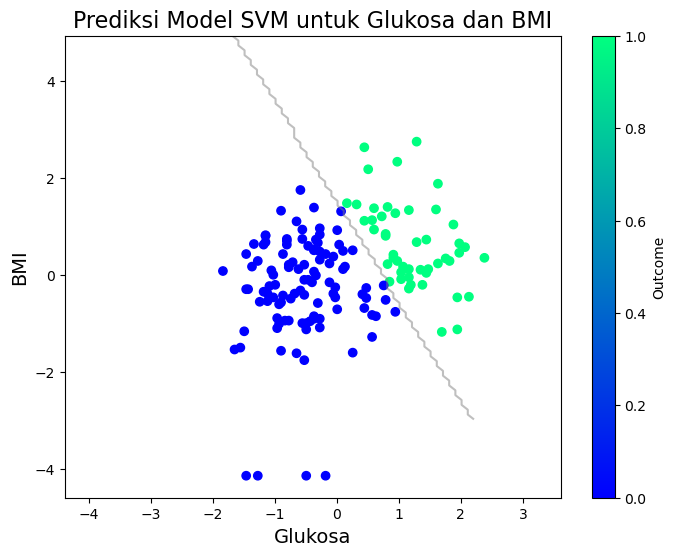

In [33]:
# Plot untuk Glukosa vs BMI dengan batas keputusan SVM
plt.figure(figsize=(8, 6))
# Membuat plot scatter untuk data uji
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_bmi, cmap='winter')
plt.xlabel('Glukosa', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('Prediksi Model SVM untuk Glukosa dan BMI', fontsize=16)
plt.colorbar(label='Outcome')
# Menambahkan garis batas keputusan SVM
Z = svm_bmi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='grey', levels=[0], alpha=0.5)
plt.show()